In [90]:
# basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [91]:
# preprocessing packages
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [92]:
# ML Models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


In [93]:
# hyperparameter tunning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

### Data Collection

In [94]:
data=pd.read_csv("Food_Delivery_Times.csv")

In [95]:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


### EDA

In [96]:
data.shape

(1000, 9)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [98]:
data.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [99]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,500.500000,288.819436,1.00,250.750,500.50,750.2500,1000.00
Distance_km,1000.0,10.059970,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.982000,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,970.0,4.579381,2.914394,0.00,2.000,5.00,7.0000,9.00
Delivery_Time_min,1000.0,56.732000,22.070915,8.00,41.000,55.50,71.0000,153.00


### separate input and output features

In [100]:
x=data.drop(["Delivery_Time_min"],axis=1)

In [101]:
y=data["Delivery_Time_min"]

### saggrigate cat and num features

In [102]:
x_num=x.select_dtypes(exclude="object")

In [103]:
x_cat=x.select_dtypes(include="object")

In [104]:
x_num.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs
0,522,7.93,12,1.0
1,738,16.42,20,2.0
2,741,9.52,28,1.0
3,661,7.44,5,1.0
4,412,19.03,16,5.0


In [105]:
x_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_ID,1000.0,500.500000,288.819436,1.00,250.750,500.50,750.2500,1000.00
Distance_km,1000.0,10.059970,5.696656,0.59,5.105,10.19,15.0175,19.99
Preparation_Time_min,1000.0,16.982000,7.204553,5.00,11.000,17.00,23.0000,29.00
Courier_Experience_yrs,970.0,4.579381,2.914394,0.00,2.000,5.00,7.0000,9.00


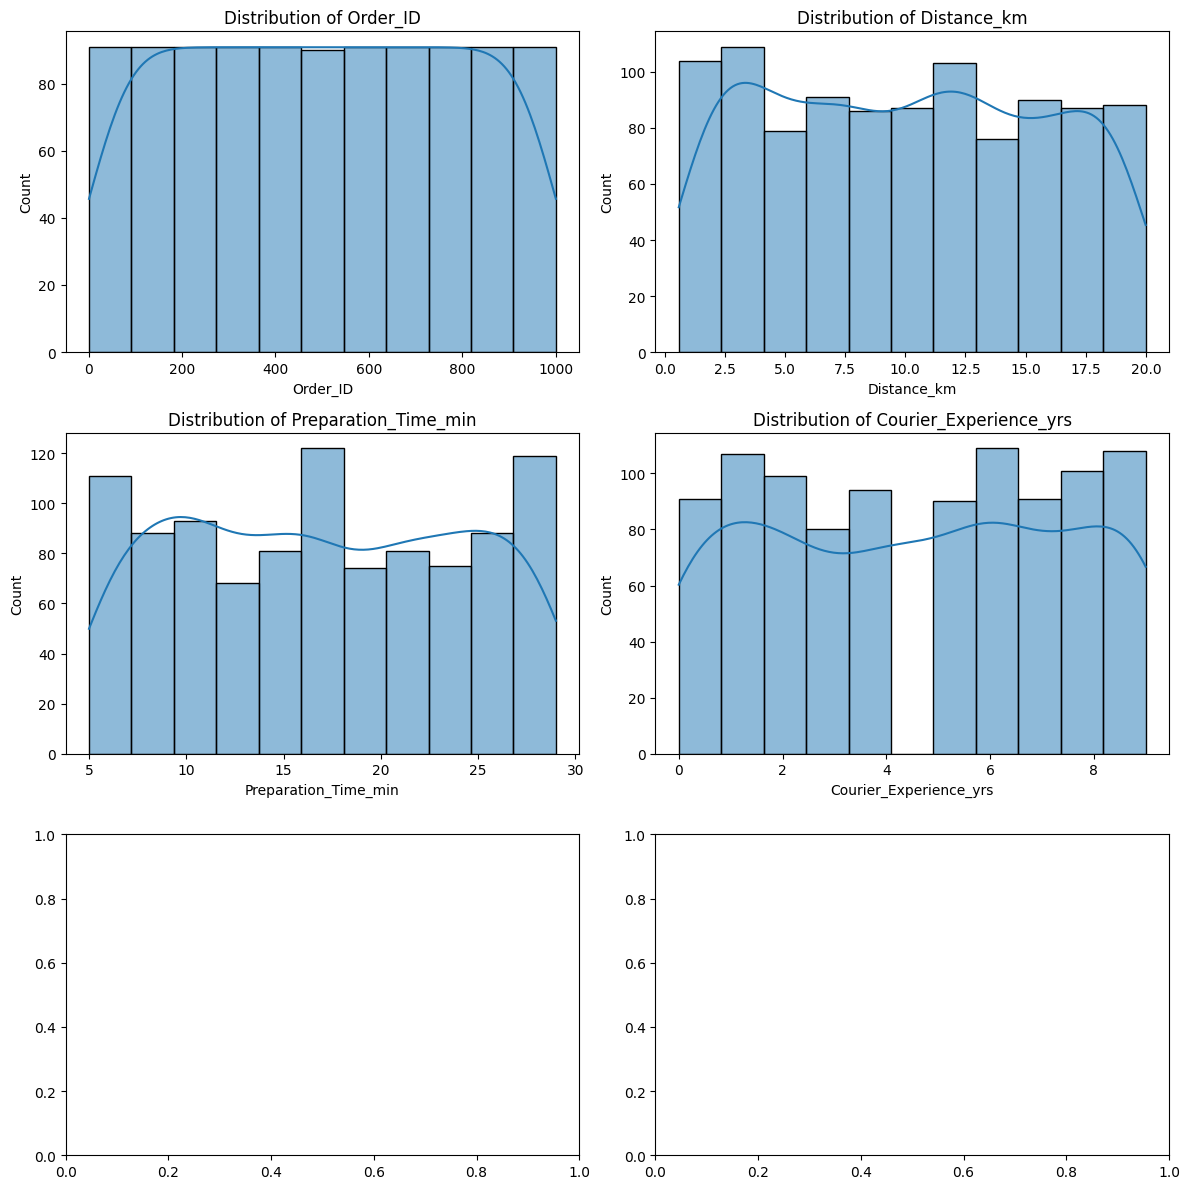

In [106]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(x_num.columns):
    sns.histplot(data=data, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

<Axes: >

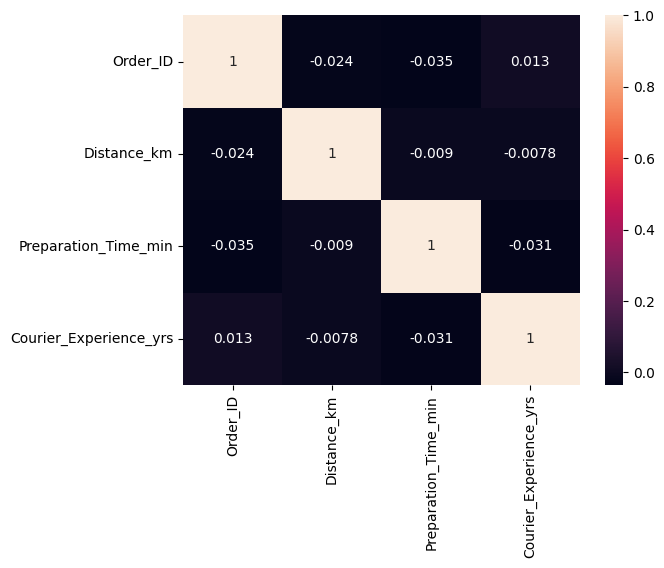

In [107]:
sns.heatmap(x_num.corr(),annot=True)

In [108]:
x_cat.head()

,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
0,Windy,Low,Afternoon,Scooter
1,Clear,Medium,Evening,Bike
2,Foggy,Low,Night,Scooter
3,Rainy,Medium,Afternoon,Scooter
4,Clear,Low,Morning,Bike


In [109]:
x_cat["Weather"].value_counts()

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

In [110]:
x_cat["Traffic_Level"].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

In [111]:
x_cat["Time_of_Day"].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

In [112]:
x_cat["Vehicle_Type"].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

### Feature Engineering

In [113]:
Weather_categories= ["Windy","Snowy","Foggy","Rainy","Clear"]
Traffic_Level_categories=["High","Low","Medium"]
Time_of_Day_categories= ["Night","Afternoon","Evening","Morning"]
Vehicle_Type_categories= ["Car","Scooter","Bike"]

In [114]:
num_pipeline=Pipeline(
    [
        ("impute",SimpleImputer()),
        ("scaler",StandardScaler())
    ]
)

In [115]:
cat_pipeline=Pipeline(
    [
        ("impute",SimpleImputer(strategy="most_frequent")),
        ("encoder",OrdinalEncoder(categories=[Weather_categories,Traffic_Level_categories,Time_of_Day_categories,Vehicle_Type_categories]))
    ]
)

In [116]:
preprocessor=ColumnTransformer(
    [
        ("num_pipeline",num_pipeline,x_num.columns),
        ("cat_pipeline",cat_pipeline,x_cat.columns)
    ]
)

### train test split

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=343)

In [118]:
x_train_pre=preprocessor.fit_transform(x_train)

In [119]:
x_test_pre=preprocessor.transform(x_test)

In [120]:
x_train=pd.DataFrame(x_train_pre,columns=preprocessor.get_feature_names_out())

In [121]:
x_test=pd.DataFrame(x_test_pre,columns=preprocessor.get_feature_names_out())

In [122]:
x_train.head()

,num_pipeline__Order_ID,num_pipeline__Distance_km,num_pipeline__Preparation_Time_min,num_pipeline__Courier_Experience_yrs,cat_pipeline__Weather,cat_pipeline__Traffic_Level,cat_pipeline__Time_of_Day,cat_pipeline__Vehicle_Type
0,-0.372156,-0.723480,0.424510,1.190798,1.0,1.0,3.0,0.0
1,1.126604,-0.328018,1.685153,0.839886,1.0,1.0,2.0,0.0
2,-1.171959,0.596460,-0.696062,-0.914671,4.0,1.0,3.0,1.0
3,-0.841606,-0.374849,-1.256347,0.488975,4.0,0.0,3.0,2.0
4,-1.613589,-1.519607,-0.275847,-1.616493,2.0,2.0,2.0,2.0


In [123]:
x_test.head()

,num_pipeline__Order_ID,num_pipeline__Distance_km,num_pipeline__Preparation_Time_min,num_pipeline__Courier_Experience_yrs,cat_pipeline__Weather,cat_pipeline__Traffic_Level,cat_pipeline__Time_of_Day,cat_pipeline__Vehicle_Type
0,0.990986,0.757767,1.685153,-0.914671,4.0,2.0,2.0,2.0
1,1.196152,-0.451166,0.564581,-1.616493,4.0,1.0,3.0,2.0
2,0.344189,-1.061704,0.564581,0.138063,4.0,2.0,1.0,1.0
3,-0.226105,-0.491059,0.704653,1.190798,3.0,1.0,2.0,2.0
4,-0.361724,1.050895,-1.536490,-1.616493,4.0,2.0,2.0,2.0


In [124]:
y_train.head()

753    53
414    58
879    43
895    48
200    72
Name: Delivery_Time_min, dtype: int64

In [125]:
y_test.head()

304    73
49     56
865    39
297    47
914    54
Name: Delivery_Time_min, dtype: int64

In [126]:
def evaluate_model(true_value,predicted_value):
    mae=mean_absolute_error(true_value,predicted_value)
    mse=mean_squared_error(true_value,predicted_value)
    rmse=np.sqrt(mse)
    rscore=r2_score(true_value,predicted_value)
    return mae,mse,rmse
        

In [127]:
models={
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNetwork": ElasticNet(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaboostRegressor": AdaBoostRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
    
}

In [128]:
model_list =[]
r2_list = []

In [129]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    #Make Predictions
    y_pred=model.predict(x_test)

    #this is a validation(test) score
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)   
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 109.38824305768672
MAE: 7.178608916074412
R2 score 1045.8883451768966


Lasso
Model Training Performance
RMSE: 110.94933404400848
MAE: 7.396557634539832
R2 score 1053.3248978544486


Ridge
Model Training Performance
RMSE: 109.41570313442705
MAE: 7.180344002780703
R2 score 1046.0196132694027


ElasticNetwork
Model Training Performance
RMSE: 153.7473335526826
MAE: 9.204058365573827
R2 score 1239.9489245637603




d:\Python\ML Revision\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Model Training Performance
RMSE: 182.86
MAE: 9.82
R2 score 1352.2573719525437


RandomForestRegressor
Model Training Performance
RMSE: 121.50204320000002
MAE: 7.8326400000000005
R2 score 1102.2796523568782


DecisionTreeRegressor
Model Training Performance
RMSE: 365.684
MAE: 12.084
R2 score 1912.2865894002396


AdaboostRegressor
Model Training Performance
RMSE: 234.8760611152384
MAE: 13.28572251487754
R2 score 1532.566674292634


GradientBoostingRegressor
Model Training Performance
RMSE: 110.03159558689046
MAE: 7.182421068032372
R2 score 1048.9594634059529


